In [2]:
import pandas as pd
import numpy as np


# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Lasso
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV

# 시각화
from pandas.io.json import json_normalize
import os
import webbrowser
import folium
from folium import plugins
import seaborn as sns
import matplotlib.pyplot as plt

# data
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

ex = pd.read_csv('2020_최종_(풍속,습도제외).csv')

In [3]:
ex.columns

Index(['날짜', '요일', '배달건수', '강수량(mm)', '평균기온(℃)', '최고기온(℃)', '최저기온(℃)'], dtype='object')

In [4]:
ex.head()

,날짜,요일,배달건수,강수량(mm),평균기온(℃),최고기온(℃),최저기온(℃)
0,20200101,수,273,0.1,-2.2,0.3,-6.5
1,20200102,목,183,NaN,1.0,3.8,-0.7
2,20200103,금,247,NaN,-0.1,4.6,-3.4
3,20200104,토,284,NaN,1.2,6.1,-2.8
4,20200105,일,226,NaN,1.3,6.6,-3.2


# 기온
- 주말

In [5]:
주말_기온 = pd.read_csv('주말_기온.csv')
평일_기온 = pd.read_csv('평일_기온.csv')

In [6]:
주말_기온

,날짜,요일,배달건수,평균기온(℃),최고기온(℃),최저기온(℃)
0,20200104,토,284,1.2,6.1,-2.8
1,20200105,일,226,1.3,6.6,-3.2
2,20200111,토,311,-0.1,3.9,-2.6
3,20200112,일,258,-1.0,2.8,-3.5
4,20200118,토,306,0.3,5.9,-4.1
...,...,...,...,...,...,...
99,20201213,일,235,-1.1,2.0,-6.0
100,20201219,토,272,-5.1,-1.2,-9.6
101,20201220,일,191,-3.7,1.1,-8.2
102,20201226,토,232,2.2,8.0,-2.1


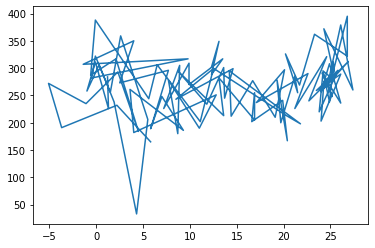

In [7]:
plt.plot(주말_기온['평균기온(℃)'], 주말_기온['배달건수'])
plt.show()

In [8]:
print(주말_기온['평균기온(℃)'].min())
print(주말_기온['평균기온(℃)'].max())

-5.1
27.4


In [9]:
bins = [-10,-5,0,5,10,15,20,25,30,35,40]
labels = ['초영하','영하',5,10,15,20,25,30,35,40]
주말_기온['주말기온그룹'] = pd.cut(주말_기온['평균기온(℃)'], bins=bins, labels=labels)

<AxesSubplot:xlabel='주말기온그룹', ylabel='count'>

C:\Users\smhrd\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 52488 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\smhrd\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50689 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\smhrd\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54616 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\smhrd\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\smhrd\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47568 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\smhrd\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44592 missing from c

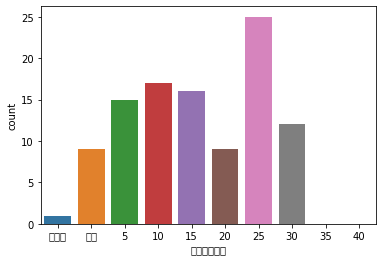

In [10]:
sns.countplot(data=주말_기온, x='주말기온그룹')

In [11]:
주말_기온.to_csv('주말_기온(그룹추가).csv', encoding='CP949')

In [12]:
w_t = pd.read_csv('주말_기온(그룹추가).csv', encoding='CP949')
w_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  104 non-null    int64  
 1   날짜          104 non-null    int64  
 2   요일          104 non-null    object 
 3   배달건수        104 non-null    int64  
 4   평균기온(℃)     104 non-null    float64
 5   최고기온(℃)     104 non-null    float64
 6   최저기온(℃)     104 non-null    float64
 7   주말기온그룹      104 non-null    object 
dtypes: float64(3), int64(3), object(2)
memory usage: 6.6+ KB


- 평일

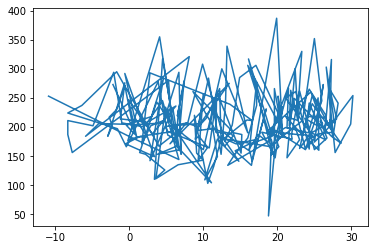

In [13]:
plt.plot(평일_기온['평균기온(℃)'], 평일_기온['배달건수'])
plt.show()

In [14]:
print(평일_기온['평균기온(℃)'].min())
print(평일_기온['평균기온(℃)'].max())

-10.9
30.2


In [15]:
bins = [-10,-5,0,5,10,15,20,25,30,35,40]
labels = ['초영하','영하',5,10,15,20,25,30,35,40]
평일_기온['평일기온그룹'] = pd.cut(평일_기온['평균기온(℃)'], bins=bins, labels=labels)

<AxesSubplot:xlabel='평일기온그룹', ylabel='count'>

C:\Users\smhrd\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 52488 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\smhrd\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50689 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\smhrd\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54616 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\smhrd\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\smhrd\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\smhrd\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44592 missing from c

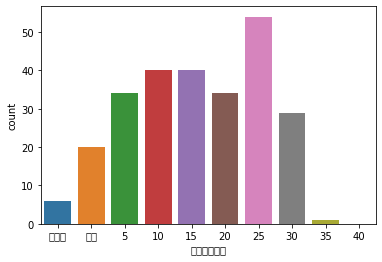

In [16]:
sns.countplot(data=평일_기온, x='평일기온그룹')

In [17]:
평일_기온.to_csv('평일_기온(그룹추가).csv', encoding='CP949')

In [18]:
d_t = pd.read_csv('평일_기온(그룹추가).csv', encoding='CP949')
d_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  259 non-null    int64  
 1   날짜          259 non-null    int64  
 2   요일          259 non-null    object 
 3   배달건수        259 non-null    int64  
 4   평균기온(℃)     259 non-null    float64
 5   최고기온(℃)     259 non-null    float64
 6   최저기온(℃)     259 non-null    float64
 7   평일기온그룹      258 non-null    object 
dtypes: float64(3), int64(3), object(2)
memory usage: 16.3+ KB


In [19]:
d_t['평일기온그룹'].fillna(-10,inplace=True)

In [20]:
d_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  259 non-null    int64  
 1   날짜          259 non-null    int64  
 2   요일          259 non-null    object 
 3   배달건수        259 non-null    int64  
 4   평균기온(℃)     259 non-null    float64
 5   최고기온(℃)     259 non-null    float64
 6   최저기온(℃)     259 non-null    float64
 7   평일기온그룹      259 non-null    object 
dtypes: float64(3), int64(3), object(2)
memory usage: 16.3+ KB


In [21]:
d_t.to_csv('평일_기온(그룹추가_f).csv', encoding='CP949')

In [22]:
d_tk = pd.read_csv('평일_기온(그룹추가_f).csv', encoding='CP949')
d_tk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    259 non-null    int64  
 1   Unnamed: 0.1  259 non-null    int64  
 2   날짜            259 non-null    int64  
 3   요일            259 non-null    object 
 4   배달건수          259 non-null    int64  
 5   평균기온(℃)       259 non-null    float64
 6   최고기온(℃)       259 non-null    float64
 7   최저기온(℃)       259 non-null    float64
 8   평일기온그룹        259 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 18.3+ KB


# 강수량
- 주말

In [23]:
주말_강수량 = pd.read_csv('주말_강수량.csv')
평일_강수량 = pd.read_csv('평일_강수량.csv')

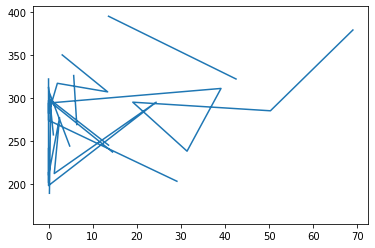

In [24]:
plt.plot(주말_강수량['강수량(mm)'], 주말_강수량['배달건수'])
plt.show()

In [25]:
print(주말_강수량['강수량(mm)'].min())
print(주말_강수량['강수량(mm)'].max())

0.0
69.0


In [26]:
bins=[-1,0,10,20,30,40,50,60,70,80,90,100]
labels = [0,10,20,30,40,50,60,70,80,90,100]
주말_강수량['주말강수량그룹'] = pd.cut(주말_강수량['강수량(mm)'],bins=bins, labels=labels)

<AxesSubplot:xlabel='주말강수량그룹', ylabel='count'>

C:\Users\smhrd\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\smhrd\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47568 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\smhrd\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\smhrd\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\smhrd\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\smhrd\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44536 missing from c

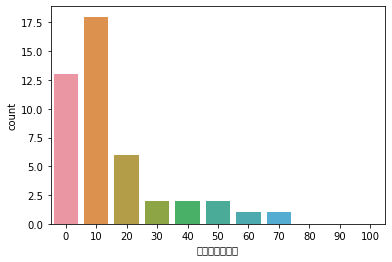

In [27]:
sns.countplot(data=주말_강수량, x='주말강수량그룹')

In [28]:
주말_강수량.to_csv('주말_강수량(그룹추가).csv', encoding='CP949')

In [29]:
w_r = pd.read_csv('주말_강수량(그룹추가).csv', encoding='CP949')
w_r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  104 non-null    int64  
 1   날짜          104 non-null    int64  
 2   요일          104 non-null    object 
 3   배달건수        104 non-null    int64  
 4   강수량(mm)     45 non-null     float64
 5   주말강수량그룹     45 non-null     float64
dtypes: float64(2), int64(3), object(1)
memory usage: 5.0+ KB


In [30]:
w_r['주말강수량그룹'].describe()

count    45.000000
mean     14.888889
std      17.005644
min       0.000000
25%       0.000000
50%      10.000000
75%      20.000000
max      70.000000
Name: 주말강수량그룹, dtype: float64

In [31]:
w_r['강수량(mm)'].fillna(10,inplace=True)
w_r['주말강수량그룹'].fillna(10,inplace=True)

In [32]:
w_r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  104 non-null    int64  
 1   날짜          104 non-null    int64  
 2   요일          104 non-null    object 
 3   배달건수        104 non-null    int64  
 4   강수량(mm)     104 non-null    float64
 5   주말강수량그룹     104 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 5.0+ KB


In [33]:
w_r.to_csv('주말_강수량(그룹추가_f).csv', encoding='CP949')
w_rk = pd.read_csv('주말_강수량(그룹추가_f).csv', encoding='CP949')
w_rk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    104 non-null    int64  
 1   Unnamed: 0.1  104 non-null    int64  
 2   날짜            104 non-null    int64  
 3   요일            104 non-null    object 
 4   배달건수          104 non-null    int64  
 5   강수량(mm)       104 non-null    float64
 6   주말강수량그룹       104 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 5.8+ KB


- 평일

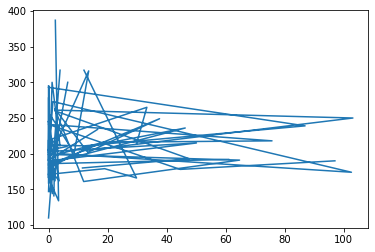

In [34]:

plt.plot(평일_강수량['강수량(mm)'], 평일_강수량['배달건수'])
plt.show()

In [35]:
print(평일_강수량['강수량(mm)'].min())
print(평일_강수량['강수량(mm)'].max())

0.0
103.1


In [36]:
bins=[-1,0,10,20,30,40,50,60,70,80,90,100]
labels = [0,10,20,30,40,50,60,70,80,90,100]
평일_강수량['평일강수량그룹'] = pd.cut(평일_강수량['강수량(mm)'],bins=bins, labels=labels)

<AxesSubplot:xlabel='평일강수량그룹', ylabel='count'>

C:\Users\smhrd\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\smhrd\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\smhrd\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\smhrd\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\smhrd\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\smhrd\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44536 missing from c

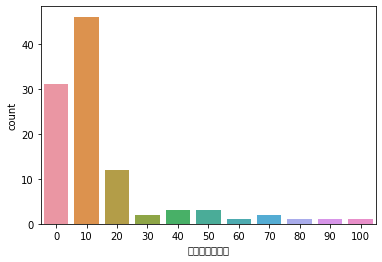

In [37]:
sns.countplot(data=평일_강수량, x='평일강수량그룹')

In [38]:
평일_강수량.to_csv('평일_강수량(그룹추가).csv', encoding='CP949')

In [39]:
d_r = pd.read_csv('평일_강수량(그룹추가).csv', encoding='CP949')
d_r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  259 non-null    int64  
 1   날짜          259 non-null    int64  
 2   요일          259 non-null    object 
 3   배달건수        259 non-null    int64  
 4   강수량(mm)     105 non-null    float64
 5   평일강수량그룹     103 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 12.3+ KB


In [40]:
d_r['평일강수량그룹'].describe()

count    103.000000
mean      14.563107
std       19.692573
min        0.000000
25%        0.000000
50%       10.000000
75%       15.000000
max      100.000000
Name: 평일강수량그룹, dtype: float64

In [41]:
d_r['강수량(mm)'].fillna(10,inplace=True)
d_r['평일강수량그룹'].fillna(10,inplace=True)

In [42]:
d_r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  259 non-null    int64  
 1   날짜          259 non-null    int64  
 2   요일          259 non-null    object 
 3   배달건수        259 non-null    int64  
 4   강수량(mm)     259 non-null    float64
 5   평일강수량그룹     259 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 12.3+ KB


In [43]:
d_r.to_csv('평일_강수량(그룹추가_f).csv', encoding='CP949')
d_rk = pd.read_csv('평일_강수량(그룹추가_f).csv', encoding='CP949')
d_rk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    259 non-null    int64  
 1   Unnamed: 0.1  259 non-null    int64  
 2   날짜            259 non-null    int64  
 3   요일            259 non-null    object 
 4   배달건수          259 non-null    int64  
 5   강수량(mm)       259 non-null    float64
 6   평일강수량그룹       259 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 14.3+ KB


- 기온(평일, 주말)묶기
- 강수량(평일, 주말)묶기

In [44]:
tf = pd.read_csv('기온통합.csv')
rf = pd.read_csv('강수량통합.csv')

In [45]:
rf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363 entries, 0 to 362
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      363 non-null    int64 
 1   요일      363 non-null    object
 2   배달건수    363 non-null    int64 
 3   강수량그룹   363 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 11.5+ KB


In [46]:
tf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363 entries, 0 to 362
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      363 non-null    int64 
 1   요일      363 non-null    object
 2   배달건수    363 non-null    int64 
 3   기온그룹    363 non-null    object
dtypes: int64(2), object(2)
memory usage: 11.5+ KB


<AxesSubplot:xlabel='기온그룹', ylabel='count'>

C:\Users\smhrd\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50689 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\smhrd\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54616 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\smhrd\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 52488 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\smhrd\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\smhrd\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50728 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\smhrd\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44536 missing from c

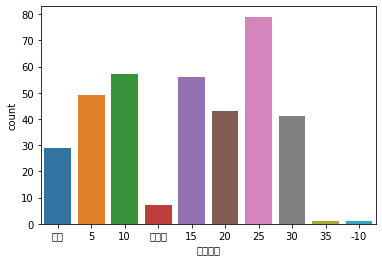

In [47]:
sns.countplot(data=tf, x='기온그룹')

<AxesSubplot:xlabel='강수량그룹', ylabel='count'>

C:\Users\smhrd\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\smhrd\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\smhrd\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\smhrd\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44536 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\smhrd\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47353 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\smhrd\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 44053 missing from c

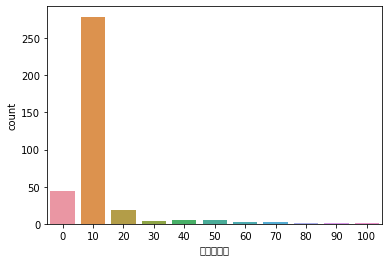

In [48]:
sns.countplot(data=rf, x='강수량그룹')

# 원핫인코딩

In [49]:
final = pd.read_csv('그룹완성.csv')

In [50]:
final

,날짜,요일,배달건수,강수량그룹,기온그룹
0,20200101,수,273,10,영하
1,20200102,목,183,10,5
2,20200103,금,247,10,영하
3,20200104,토,284,10,5
4,20200105,일,226,10,5
...,...,...,...,...,...
358,20201226,토,232,10,5
359,20201227,일,165,0,10
360,20201228,월,144,10,10
361,20201229,화,183,10,5


In [51]:
final.corr()

,날짜,배달건수,강수량그룹
날짜,1.000000,0.024825,0.071203
배달건수,0.024825,1.000000,0.084981
강수량그룹,0.071203,0.084981,1.000000


In [52]:
one_hot1 = pd.get_dummies(final['요일'])

In [53]:
one_hot1

,금,목,수,월,일,토,화
0,0,0,1,0,0,0,0
1,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0
4,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...
358,0,0,0,0,0,1,0
359,0,0,0,0,1,0,0
360,0,0,0,1,0,0,0
361,0,0,0,0,0,0,1


In [54]:
one_hot2 = pd.get_dummies(final['기온그룹'])

In [55]:
one_hot2

,-10,10,15,20,25,30,35,5,영하,초영하
0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
358,0,0,0,0,0,0,0,1,0,0
359,0,1,0,0,0,0,0,0,0,0
360,0,1,0,0,0,0,0,0,0,0
361,0,0,0,0,0,0,0,1,0,0


In [56]:
final.drop('요일', axis=1, inplace=True)

In [57]:
final.drop('기온그룹', axis=1, inplace=True)

In [58]:
total_combine1 = pd.concat([final,one_hot1],axis=1)

In [59]:
total_combine1

,날짜,배달건수,강수량그룹,금,목,수,월,일,토,화
0,20200101,273,10,0,0,1,0,0,0,0
1,20200102,183,10,0,1,0,0,0,0,0
2,20200103,247,10,1,0,0,0,0,0,0
3,20200104,284,10,0,0,0,0,0,1,0
4,20200105,226,10,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
358,20201226,232,10,0,0,0,0,0,1,0
359,20201227,165,0,0,0,0,0,1,0,0
360,20201228,144,10,0,0,0,1,0,0,0
361,20201229,183,10,0,0,0,0,0,0,1


In [60]:
total_combine1.to_csv('total_combine1.csv', encoding='CP949')
total_combine1 = pd.read_csv('total_combine1.csv', encoding='CP949')
total_combine1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363 entries, 0 to 362
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  363 non-null    int64
 1   날짜          363 non-null    int64
 2   배달건수        363 non-null    int64
 3   강수량그룹       363 non-null    int64
 4   금           363 non-null    int64
 5   목           363 non-null    int64
 6   수           363 non-null    int64
 7   월           363 non-null    int64
 8   일           363 non-null    int64
 9   토           363 non-null    int64
 10  화           363 non-null    int64
dtypes: int64(11)
memory usage: 31.3 KB


In [61]:
total_combine2 = pd.concat([final,one_hot2],axis=1)

In [62]:
total_combine2

,날짜,배달건수,강수량그룹,-10,10,15,20,25,30,35,5,영하,초영하
0,20200101,273,10,0,0,0,0,0,0,0,0,1,0
1,20200102,183,10,0,0,0,0,0,0,0,1,0,0
2,20200103,247,10,0,0,0,0,0,0,0,0,1,0
3,20200104,284,10,0,0,0,0,0,0,0,1,0,0
4,20200105,226,10,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,20201226,232,10,0,0,0,0,0,0,0,1,0,0
359,20201227,165,0,0,1,0,0,0,0,0,0,0,0
360,20201228,144,10,0,1,0,0,0,0,0,0,0,0
361,20201229,183,10,0,0,0,0,0,0,0,1,0,0


In [63]:
total_combine2.to_csv('total_combine2.csv', encoding='CP949')
total_combine2 = pd.read_csv('total_combine2.csv', encoding='CP949')
total_combine2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363 entries, 0 to 362
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  363 non-null    int64
 1   날짜          363 non-null    int64
 2   배달건수        363 non-null    int64
 3   강수량그룹       363 non-null    int64
 4   -10         363 non-null    int64
 5   10          363 non-null    int64
 6   15          363 non-null    int64
 7   20          363 non-null    int64
 8   25          363 non-null    int64
 9   30          363 non-null    int64
 10  35          363 non-null    int64
 11  5           363 non-null    int64
 12  영하          363 non-null    int64
 13  초영하         363 non-null    int64
dtypes: int64(14)
memory usage: 39.8 KB


In [64]:
renew = pd.merge(left = total_combine1, right = total_combine2, how = "left", on = ["날짜",'배달건수','강수량그룹'])

In [65]:
renew

,Unnamed: 0_x,날짜,배달건수,강수량그룹,금,목,수,월,일,토,...,-10,10,15,20,25,30,35,5,영하,초영하
0,0,20200101,273,10,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,20200102,183,10,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2,20200103,247,10,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,3,20200104,284,10,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,4,20200105,226,10,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,358,20201226,232,10,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
359,359,20201227,165,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
360,360,20201228,144,10,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
361,361,20201229,183,10,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [66]:
renew.to_csv('renew.csv', encoding='CP949')
renew = pd.read_csv('renew.csv', encoding='CP949')
renew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363 entries, 0 to 362
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Unnamed: 0    363 non-null    int64
 1   Unnamed: 0_x  363 non-null    int64
 2   날짜            363 non-null    int64
 3   배달건수          363 non-null    int64
 4   강수량그룹         363 non-null    int64
 5   금             363 non-null    int64
 6   목             363 non-null    int64
 7   수             363 non-null    int64
 8   월             363 non-null    int64
 9   일             363 non-null    int64
 10  토             363 non-null    int64
 11  화             363 non-null    int64
 12  Unnamed: 0_y  363 non-null    int64
 13  -10           363 non-null    int64
 14  10            363 non-null    int64
 15  15            363 non-null    int64
 16  20            363 non-null    int64
 17  25            363 non-null    int64
 18  30            363 non-null    int64
 19  35            363 non-null   

In [67]:
final_group = pd.read_csv('그룹완성(인코딩 후).csv')

In [68]:
final_group.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363 entries, 0 to 362
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   날짜      363 non-null    int64
 1   배달건수    363 non-null    int64
 2   강수량그룹   363 non-null    int64
 3   금       363 non-null    int64
 4   목       363 non-null    int64
 5   수       363 non-null    int64
 6   월       363 non-null    int64
 7   일       363 non-null    int64
 8   토       363 non-null    int64
 9   화       363 non-null    int64
 10  -10     363 non-null    int64
 11  10      363 non-null    int64
 12  15      363 non-null    int64
 13  20      363 non-null    int64
 14  25      363 non-null    int64
 15  30      363 non-null    int64
 16  35      363 non-null    int64
 17  5       363 non-null    int64
 18  영하      363 non-null    int64
 19  초영하     363 non-null    int64
dtypes: int64(20)
memory usage: 56.8 KB


# 분류모델로 변경

In [69]:
y_train = final_group['배달건수']
final_group.drop('배달건수', axis=1, inplace=True)
X_train = final_group

In [70]:
X_train.head()

,날짜,강수량그룹,금,목,수,월,일,토,화,-10,10,15,20,25,30,35,5,영하,초영하
0,20200101,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,20200102,10,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,20200103,10,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,20200104,10,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,20200105,10,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [71]:
y_train = pd.DataFrame(y_train)
y_train

,배달건수
0,273
1,183
2,247
3,284
4,226
...,...
358,232
359,165
360,144
361,183


In [72]:
print(y_train.max())
print(y_train.min())

배달건수    395
dtype: int64
배달건수    33
dtype: int64


In [73]:
bins=[-1,50,100,150,200,250,300,350,400]
labels = [50,100,150,200,250,300,350,400]
y_train['배달건수'] = pd.cut(y_train['배달건수'],bins=bins, labels=labels)

In [74]:
y_train = y_train['배달건수']

In [76]:
y_train

0      300
1      200
2      250
3      300
4      250
      ... 
358    250
359    200
360    150
361    200
362    300
Name: 배달건수, Length: 363, dtype: category
Categories (8, int64): [50 < 100 < 150 < 200 < 250 < 300 < 350 < 400]

# 모델

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, random_state=7)
X_train.shape,X_test.shape, y_train.shape, y_test.shape
#7:3

((272, 19), (91, 19), (272,), (91,))

In [78]:
train_score_list = []
val_score_list = []

for md in range(1,50) : # 트리 모델이 단순 -> 복잡
    t_model = DecisionTreeClassifier(max_depth=md)#max_depth : 최대 깊이
    t_model.fit(X_train,y_train)
    
    train_score = t_model.score(X_train,y_train)#분류 모델의 score 메서드는 정확도를 리턴
    val_score = t_model.score(X_test,y_test)
    
    train_score_list.append(train_score)
    val_score_list.append(val_score)

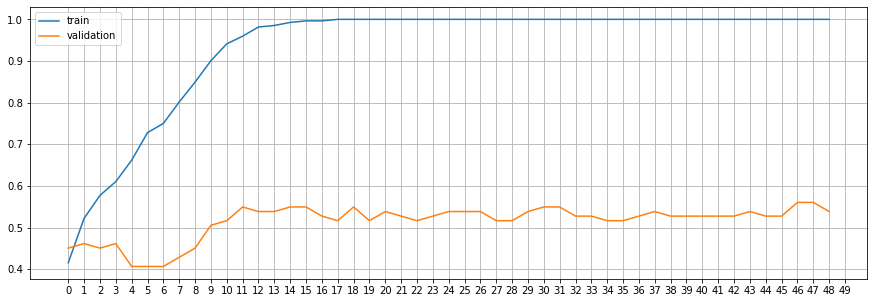

In [79]:
plt.figure(figsize=(15,5)) # 가로,세로--figure : 그래프를 표현할 액자
plt.plot(train_score_list,label='train')
plt.plot(val_score_list,label='validation')
plt.xticks(range(0,50))
plt.legend() # 범례
plt.grid()
plt.show()

- train값도 같이 가장 높은 11을 max_depth으로 선택

In [80]:
X_train=pd.concat([X_train,X_test])
y_train=pd.concat([y_train,y_test])

In [81]:
X_train.shape, y_train.shape

((363, 19), (363,))

- DecisionTreeClassifier(결정트리)

In [82]:
decision_tree = DecisionTreeClassifier(max_depth=11)
decision_tree.fit(X_train, y_train)
decision_tree.predict(X_test)
decision_tree.score(X_test, y_test)

0.9230769230769231

In [84]:
for i in range (2,10):
    print(cross_val_score(decision_tree, X_train, y_train, cv=i).mean())
#9로 하기

0.49040738267257605
0.465564738292011
0.5042124542124542
0.520738203957382
0.5233606557377048
0.5344753285929756
0.528623188405797


C:\Users\smhrd\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\smhrd\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\smhrd\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\smhrd\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=6.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\smhrd\Anaconda3\lib\site-packages\s

0.528658536585366


In [85]:
for md in range(1,50):
    t_model=DecisionTreeClassifier(max_depth=md)
    t_model.fit(X_train,y_train)
    
    #교차검증
    result=cross_val_score(t_model,X_train,y_train,cv=9)
    print('max_depth : ',md,'score:',result.mean())

C:\Users\smhrd\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=9.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\smhrd\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=9.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\smhrd\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=9.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\smhrd\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=9.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\smhrd\Anaconda3\lib\site-packages\s

max_depth :  1 score: 0.4243224932249323
max_depth :  2 score: 0.48468834688346885
max_depth :  3 score: 0.5092818428184281
max_depth :  4 score: 0.4872628726287263
max_depth :  5 score: 0.49850948509485093
max_depth :  6 score: 0.5065718157181571


C:\Users\smhrd\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=9.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\smhrd\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=9.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\smhrd\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=9.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\smhrd\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=9.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\smhrd\Anaconda3\lib\site-packages\s

max_depth :  7 score: 0.509010840108401
max_depth :  8 score: 0.5342818428184282
max_depth :  9 score: 0.511720867208672
max_depth :  10 score: 0.5204607046070462
max_depth :  11 score: 0.5287940379403795
max_depth :  12 score: 0.5342140921409215


C:\Users\smhrd\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=9.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\smhrd\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=9.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\smhrd\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=9.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\smhrd\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=9.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\smhrd\Anaconda3\lib\site-packages\s

max_depth :  13 score: 0.5203252032520326
max_depth :  14 score: 0.5149728997289973
max_depth :  15 score: 0.5259485094850948
max_depth :  16 score: 0.5369918699186992
max_depth :  17 score: 0.5288617886178862
max_depth :  18 score: 0.5316395663956639


C:\Users\smhrd\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=9.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\smhrd\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=9.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\smhrd\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=9.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\smhrd\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=9.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\smhrd\Anaconda3\lib\site-packages\s

max_depth :  19 score: 0.5287262872628726
max_depth :  20 score: 0.5342818428184283
max_depth :  21 score: 0.5204607046070461
max_depth :  22 score: 0.523170731707317
max_depth :  23 score: 0.523170731707317
max_depth :  24 score: 0.5287262872628726


C:\Users\smhrd\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=9.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\smhrd\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=9.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\smhrd\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=9.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\smhrd\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=9.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\smhrd\Anaconda3\lib\site-packages\s

max_depth :  25 score: 0.5398373983739837
max_depth :  26 score: 0.5399051490514906
max_depth :  27 score: 0.5177506775067751
max_depth :  28 score: 0.5260840108401084
max_depth :  29 score: 0.537059620596206
max_depth :  30 score: 0.5259485094850949


C:\Users\smhrd\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=9.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\smhrd\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=9.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\smhrd\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=9.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\smhrd\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=9.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\smhrd\Anaconda3\lib\site-packages\s

max_depth :  31 score: 0.5344173441734417
max_depth :  32 score: 0.5426829268292683
max_depth :  33 score: 0.5425474254742548
max_depth :  34 score: 0.5233062330623306
max_depth :  35 score: 0.5095528455284553
max_depth :  36 score: 0.5426151761517615


C:\Users\smhrd\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=9.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\smhrd\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=9.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\smhrd\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=9.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\smhrd\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=9.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\smhrd\Anaconda3\lib\site-packages\s

max_depth :  37 score: 0.5398373983739837
max_depth :  38 score: 0.5371951219512194
max_depth :  39 score: 0.5288617886178862
max_depth :  40 score: 0.531639566395664
max_depth :  41 score: 0.534349593495935
max_depth :  42 score: 0.5426151761517616


C:\Users\smhrd\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=9.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\smhrd\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=9.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\smhrd\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=9.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\smhrd\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=9.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\smhrd\Anaconda3\lib\site-packages\s

max_depth :  43 score: 0.5371273712737128
max_depth :  44 score: 0.5399051490514907
max_depth :  45 score: 0.5481029810298104
max_depth :  46 score: 0.5204607046070461
max_depth :  47 score: 0.5258807588075881
max_depth :  48 score: 0.5287940379403794
max_depth :  49 score: 0.5426151761517615


C:\Users\smhrd\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=9.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\smhrd\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=9.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\smhrd\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=9.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\smhrd\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=9.
  warnings.warn(("The least populated class in y has only %d"


- GrandientBoosting Model

In [89]:
gd_model = GradientBoostingClassifier()
gd_model.fit(X_train, y_train)
gd_model.predict(X_test)
gd_model.score(X_test, y_test)

0.9560439560439561

- RandomForest Model

In [87]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
random_forest.predict(X_test)
random_forest.score(X_test, y_test)

1.0

- DecisionTreeClassifier(결정트리)

In [88]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
decision_tree.predict(X_test)
decision_tree.score(X_test, y_test)

1.0

In [ ]:
logi_model = LogisticRegression()
logi_model.fit(X_train, y_train)
logi_model.predict(X_test)
logi_model.score(X_test, y_test)

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
knn.predict(X_test)
knn.score(X_test, y_test)

In [ ]:
line_model = LinearRegression()
line_model.fit(X_train, y_train)
line_model.predict(X_test)
line_model.score(X_test, y_test)

In [ ]:
print('train score: ', line_model.score(X_train, y_train))
print('test score : ', line_model.score(X_test, y_test))

In [ ]:
lasso_model = Lasso(alpha = 1)
lasso_model.fit(X_train, y_train)
lasso_model.predict(X_test)
lasso_model.score(X_test, y_test)

In [ ]:
print('train score: ', lasso_model.score(X_train, y_train))
print('test score : ', lasso_model.score(X_test, y_test))

In [ ]:
lasso_model.coef_
print('사용한 특성의 개수 : ', np.sum(lasso_model.coef_ != 0))

In [ ]:
# alpha 값을 낮춰주면 사용하는 특성의 개수가 늘어난다.

lasso_model = Lasso(alpha = 0.01)
lasso_model.fit(X_train, y_train)
print('train score: ', lasso_model.score(X_train, y_train))
print('test score : ', lasso_model.score(X_test, y_test))
print('사용한 특성의 개수 : ', np.sum(lasso_model.coef_ != 0))

In [ ]:
sgd_model = SGDRegressor(max_iter = 500, # 가중치 업데이트 횟수
                        eta0 = 0.05, # 학습률 (learning rate) - 0.1 내외 (비율)
                        verbose = 1) # 학습 과정 확인

In [ ]:
sgd_model.fit(X_train, y_train)

In [ ]:
print(sgd_model.coef_)
print(sgd_model.intercept_)

In [ ]:
sgd_model.predict(X_test)

In [ ]:
sgd_model.score(X_test, y_test)

# 파라미터 조정

In [ ]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_model.predict(X_test)
rf_model.score(X_test, y_test)

In [ ]:
for md in range(900,1500,100):
    rf_model = RandomForestClassifier(n_estimators=md)
    rf_model.fit(X_train,y_train)
    result = cross_val_score(rf_model, X_train, y_train, cv=9).mean()
    print('n_estimators:', md, 'score:', result)

# GridSearch

- GradientBoosting

In [ ]:
gd_model = GradientBoostingClassifier()

In [ ]:
gd_model.get_params().keys()

In [ ]:
rf_model.get_params().keys()

In [ ]:
param_grid = {
    'learning_rate' : [0.05, 0.25],
    'max_depth' : [5,7],
    'n_estimators' : [500, 700, 1000],
}#2*2*3=12번 학습함번 학습함

In [ ]:
grid = GridSearchCV(gd_model, param_grid, cv=9)

In [ ]:
grid.fit(X_train, y_train)

In [ ]:
print('best score : ', grid.best_score_)
print('best score : ', grid.best_params_)

- RandomForest

In [ ]:
rf_model.get_params().keys()

In [ ]:
param_grid = {
    'max_depth': [5, 10, 15, 20],
    'max_features': [0.5, 0.7],
    'max_leaf_nodes': [20, 50, 80],
    'n_estimators': [1000, 1500, 2000, 2500]
}

In [ ]:
grid = GridSearchCV(rf_model, param_grid, cv=9)

In [ ]:
grid.fit(X_train, y_train)

In [ ]:
print('best score : ', grid.best_score_)
print('best score : ', grid.best_params_)